## TapDanceDecoder: MVP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [2]:
#tap_df = pd.read_csv('../../../Source/Data/Train_data_n40.csv')
tap_df = pd.read_csv('../../../Source/Data/audio_data.csv')

In [3]:
tap_df.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,BPM,ZCR,RMSE,STE
0,../../../Source/Clean_train_clips/Shuffle/1/1.wav,1,-152.435155,78.311769,-106.482258,40.668131,-6.848575,-13.537377,-25.102485,6.754208,...,-10.265548,-2.854873,-2.821410,-11.892168,-1.505338,-2.087528,258.398438,0.183553,0.113765,3.927907
1,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-143.991075,65.523449,-102.436753,32.133732,-7.930019,-3.615873,-29.871724,-0.182348,...,-13.680871,-0.441789,-5.826206,-15.578982,-4.161982,-2.657234,215.332031,0.187988,0.105637,3.369918
2,../../../Source/Clean_train_clips/Shuffle/1/11...,1,-129.072670,59.774233,-97.656748,35.739948,-4.885226,-0.900206,-23.750029,-4.998659,...,-14.757999,-2.040899,-4.384916,-20.807594,-8.360181,-2.981402,234.907670,0.201621,0.082684,1.902416
3,../../../Source/Clean_train_clips/Shuffle/1/12...,1,-157.448416,71.945819,-105.594077,33.904608,-1.771036,-8.738653,-30.610143,1.405105,...,-14.136805,-4.416947,-4.629338,-16.549472,-3.571637,-3.324539,215.332031,0.185764,0.094802,2.716855
4,../../../Source/Clean_train_clips/Shuffle/1/13...,1,-182.069789,83.063060,-97.683985,32.842908,3.010242,5.194879,-24.979170,0.772903,...,-13.376806,-5.384937,-2.593670,-19.554310,-7.848034,-1.967332,184.570312,0.180020,0.068570,1.398406


## Models

### LogReg it like you mean it!

In [25]:
data = tap_df.iloc[:,2:].values
labels = tap_df['Labels']

In [27]:
data
#labels


array([[-1.52435155e+02,  7.83117693e+01, -1.06482258e+02, ...,
         1.83553060e-01,  1.13765448e-01,  3.92790711e+00],
       [-1.43991075e+02,  6.55234491e+01, -1.02436753e+02, ...,
         1.87988281e-01,  1.05637036e-01,  3.36991802e+00],
       [-1.29072670e+02,  5.97742333e+01, -9.76567480e+01, ...,
         2.01621094e-01,  8.26842040e-02,  1.90241615e+00],
       ...,
       [-1.75902702e+02,  7.17048030e+01, -9.98925117e+01, ...,
         1.68273926e-01,  7.83131048e-02,  2.04752400e+00],
       [-1.61098657e+02,  9.19380869e+01, -1.08378352e+02, ...,
         1.76468461e-01,  7.09584206e-02,  1.69808359e+00],
       [-1.94718871e+02,  1.06080963e+02, -1.01207606e+02, ...,
         1.54259315e-01,  6.39540181e-02,  1.38981479e+00]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=11, stratify=labels)

In [ ]:
#X_train = pd.read_csv('../../../Source/Data/X_train_mfccplus.csv')
#y_train = pd.read_csv('../../../Source/Data/y_train_mfccplus.csv')
#X_test = pd.read_csv('../../../Source/Data/X_test_mfccplus.csv')
#y_test = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')
#
#X_train = X_train.drop(['Path'], axis = 1).values
#X_test = X_test.drop(['Path'], axis = 1).values
#y_train = y_train.values.ravel()
#y_test = y_test.values.ravel()

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [9]:
results = pd.DataFrame()
results['True'] = y_test
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [10]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_lr'])]
mistakes

,True,Predict_lr,Prob_0_lr
310,0,1,0.011390
232,0,1,0.442047
78,1,0,0.565010
66,1,0,0.956233
277,0,1,0.341742
202,0,1,0.489852
309,0,1,0.119194
65,1,0,0.985220
84,1,0,0.542112
19,1,0,0.500954


In [11]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.8932038834951457


### YAAAAAAAAASSSSSS QUEEN!

### Visualizing results

In [22]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', size=15)
    plt.ylabel('True Positive Rate', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

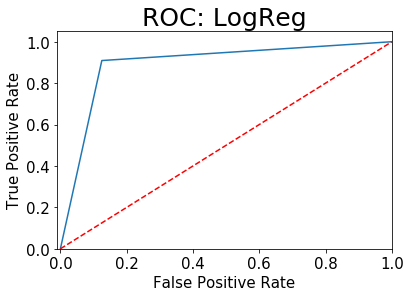

ROC_AUC_Score: 0.8920454545454545


In [23]:
ROC_plot('LogReg',  y_test, predict )

## Can't see the forest for the trees.... Random Forest Classifier

In [14]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [16]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [17]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_rf'])]
mistakes

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
309,0,1,0.119194,1,0.389893


So where the Random Forest model makes mistakes, the LogReg model makes correct predictions. <br/>Perhaps a voting classifier would improve the accuracy even more.

In [18]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.9902912621359223


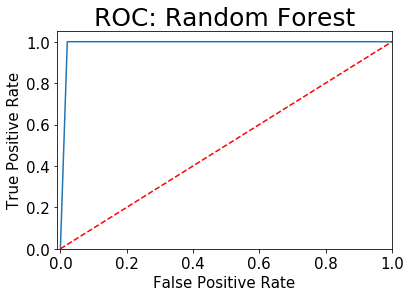

ROC_AUC_Score: 0.9895833333333333


In [24]:
ROC_plot('Random Forest', y_test, predict_rf)

In [ ]:
#results.to_csv('../../../Source/Data/Train_results_mfccplus_perfect.csv', index=None)